In [1]:
from utilities import NoisyLearningAlgorithm
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler


Feature space deimension: 64
Sum of explained variance with 2 components: 0.2850936482369929


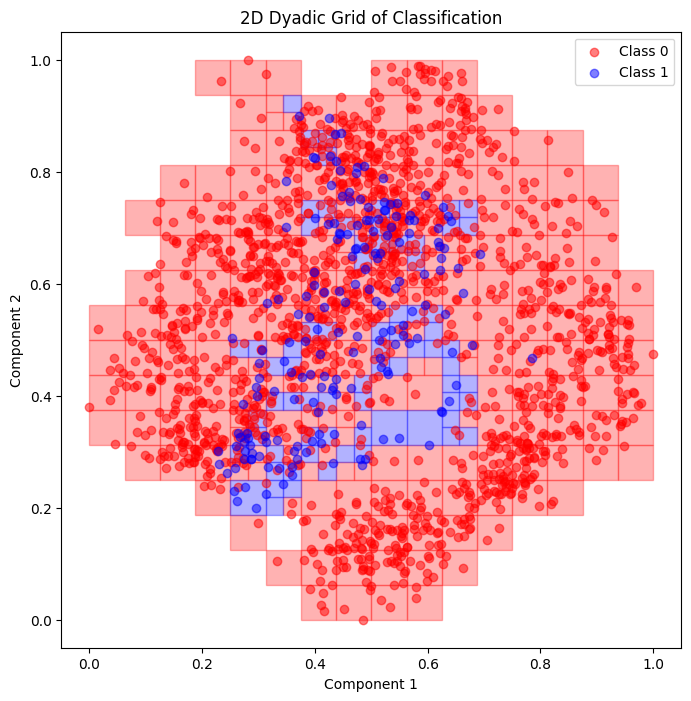

Model: NoisyLearningAlgorithm
Mean Accuracy: 0.8581
Mean AUC-ROC: 0.6529
report:                      0           1  accuracy    macro avg  weighted avg
precision     0.930380    0.331797  0.858097     0.631088      0.869755
recall        0.910217    0.395604  0.858097     0.652911      0.858097
f1-score      0.920188    0.360902  0.858097     0.640545      0.863543
support    1615.000000  182.000000  0.858097  1797.000000   1797.000000


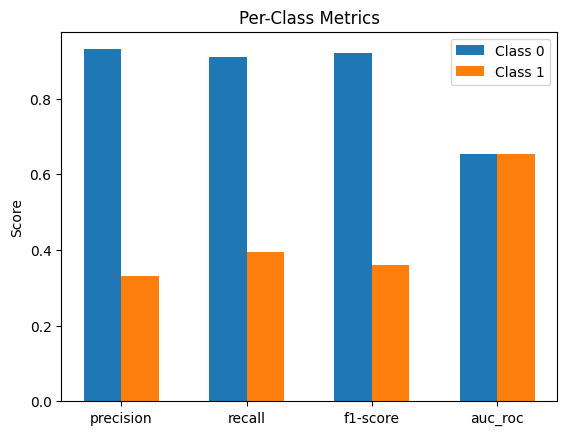

In [2]:
digits = load_digits()
X, y = digits.data, digits.target
labels = (y == 5).astype(int)  # Binary classification: 1 if digit is 1, else 0. y could be any number in [0, 9]

# Reduce dimension by PCA and scale to [0,1]^k
print(f'Feature space deimension: {X.shape[1]}')
feature_dimension = 2 # for feature_dimension = 2 and 3, it plots the 2D or #d dyadic grid
pca = PCA(n_components=feature_dimension)
X_pca = pca.fit_transform(X)
print(f'Sum of explained variance with {feature_dimension} components: {sum(pca.fit(X).explained_variance_ratio_)}')
scaler = MinMaxScaler(feature_range=(0, .9999999))
data = scaler.fit_transform(X_pca)

# Run algorithm
algo = NoisyLearningAlgorithm(n_budget=200, delta=0.05, alpha=0.01, lambda_=1.0, feature_dimension= feature_dimension, B_l_alpha= .3, initial_depth_level= 4)
s0, s1, ac, results= algo.run(data, labels)
algo.plot_dyadic_grid(data,labels)
algo.evaluate_model(data, labels)